# Dataset Link Kaggle: 
https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


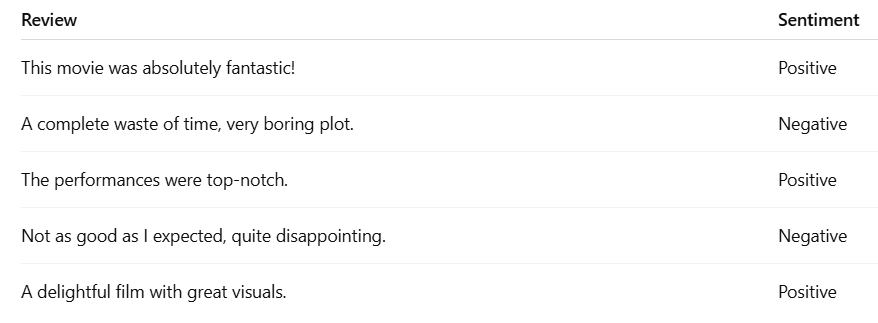




# Text Transformation


In NLP, converting text to numbers is done using techniques like Bag of Words (BoW), TF-IDF, or word embeddings (e.g., Word2Vec, GloVe). These methods transform words or documents into numeric vectors so machine learning models can process them.



# BoW: 

Bag of Words (BoW) works by converting text into fixed-length vectors based on word frequency, ignoring grammar and word order. Each unique word in the corpus becomes a column, and the value is the count of that word in the sentence.

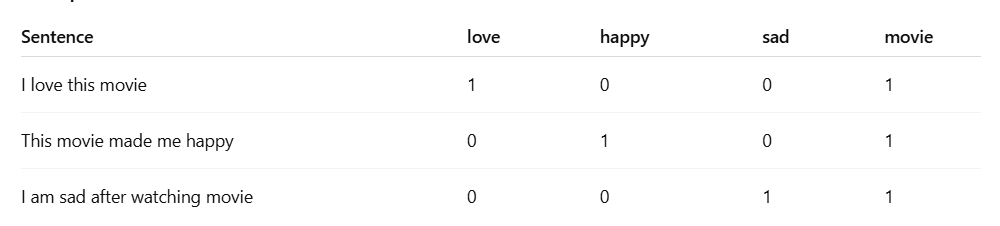


# Load Social Sentiment Dataset

In [2]:
import pandas as pd 

df = pd.read_csv("IMDB Dataset.csv",nrows=3000)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
2995,To experience Head you really need to understa...,positive
2996,"I'm a fan of Judy Garland, Vincente Minnelli, ...",negative
2997,"""Mr. Harvey Lights a Candle"" is anchored by a ...",positive
2998,Della Myers (Kim Basinger) is an upper-class h...,negative


In [3]:
df['sentiment'].value_counts()

sentiment
positive    1508
negative    1492
Name: count, dtype: int64

# Train Test Split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['review'],df['sentiment'],test_size=0.2, random_state=42)

# Feature Extraction / Text Transformation

ngram_range=(1,2): Includes both unigrams and bigrams (single words and pairs of consecutive words).


max_features=1000: Limits the vocabulary to the top 1000 most frequent terms.


stop_words='english': Removes common English stop words (like "the", "and", "is").

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2),max_features=1000, stop_words='english')

X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

X_test_bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# Train and Eval Model

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

model = SVC()

model.fit(X_train_bow,y_train)

y_pred = model.predict(X_test_bow)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.76      0.81       316
    positive       0.77      0.87      0.82       284

    accuracy                           0.81       600
   macro avg       0.82      0.82      0.81       600
weighted avg       0.82      0.81      0.81       600

[[241  75]
 [ 36 248]]


# Prediction System

In [44]:
new_input = "The movie was good"

input_transformed = vectorizer.transform([new_input])

model.predict(input_transformed)[0]

'positive'

In [45]:
new_input = "The movie was bad"

input_transformed = vectorizer.transform([new_input])

model.predict(input_transformed)[0]

'negative'